## Random Forest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import segyio

In [2]:
# Preprocess seismic data
def preprocess_data(seismic):
    """
    Apply edge detection and normalize seismic data.
    """
    edges = sobel(seismic)
    edges_normalized = (edges - np.min(edges)) / (np.max(edges) - np.min(edges))
    return edges_normalized

In [3]:
# Extract features and labels
def extract_features_and_labels(seismic, faults):
    """
    Convert seismic data into features and labels for the classifier.
    """
    features = preprocess_data(seismic).reshape(-1, 1)  # Flatten for sklearn
    labels = faults.flatten()  # Flatten fault labels to match features
    return features, labels

In [4]:
# Visualize seismic data, ground truth, and preprocessed features
def visualize_data(seismic, faults, preprocessed):
    """
    Plot seismic data, fault labels, and preprocessed features for inspection.
    """
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.title("Seismic Data")
    plt.imshow(seismic[0, :, :], cmap="seismic")
    plt.subplot(1, 3, 2)
    plt.title("Fault Ground Truth")
    plt.imshow(faults[0, :, :], cmap="gray")
    plt.subplot(1, 3, 3)
    plt.title("Preprocessed Features")
    plt.imshow(preprocessed[0, :, :], cmap="gray")
    plt.show()


In [5]:
# Train Random Forest model
def train_random_forest(features, labels, test_size=0.2, n_components=None):
    """
    Train a Random Forest classifier on seismic data features.
    """
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42)

    # Optional: Dimensionality reduction
    if n_components and n_components <= min(X_train.shape[0], X_train.shape[1]):
        pca = PCA(n_components=n_components)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
    else:
        pca = None

    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Evaluate model
    y_pred = rf.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return rf, pca

In [6]:
# Predict faults using trained model
def predict_faults(rf, pca, seismic):
    """
    Predict fault labels for new seismic data.
    """
    features = preprocess_data(seismic).reshape(-1, 1)
    if pca:
        features = pca.transform(features)
    predictions = rf.predict(features)
    return predictions.reshape(seismic.shape)

In [7]:
# Visualize predictions
def visualize_predictions(seismic, faults, predictions):
    """
    Plot seismic data, ground truth faults, and predictions side by side.
    """
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.title("Seismic Data")
    plt.imshow(seismic[0, :, :], cmap="seismic")
    plt.subplot(1, 3, 2)
    plt.title("Fault Ground Truth")
    plt.imshow(faults[0, :, :], cmap="gray")
    plt.subplot(1, 3, 3)
    plt.title("Predicted Faults")
    plt.imshow(predictions[0, :, :], cmap="gray")
    plt.show()

In [8]:
filename_seismic = "C:\\Users\\hsk21\\Desktop\\MLcourse\\github\\Seismic-Fault-Detection-using-Convolutional-Neural-Network\\Equinor Synthetic model\\Equinor Synthetic model\\issap20_Pp.sgy"
filename_ai = "C:\\Users\\hsk21\\Desktop\\MLcourse\\github\\Seismic-Fault-Detection-using-Convolutional-Neural-Network\\Equinor Synthetic model\\Equinor Synthetic model\\issap20_Fault.sgy"
filename_fault = "C:\\Users\\hsk21\\Desktop\\MLcourse\\github\\Seismic-Fault-Detection-using-Convolutional-Neural-Network\\Equinor Synthetic model\\Equinor Synthetic model\\issap20_Fault.sgy"



In [9]:
# Note: the the xline header info location is at segyio.su.cdpx [181]
def segy2numpy(filename: str) -> np.array:
    with segyio.open(filename, xline=181) as segyfile:
        return segyio.tools.cube(segyfile)


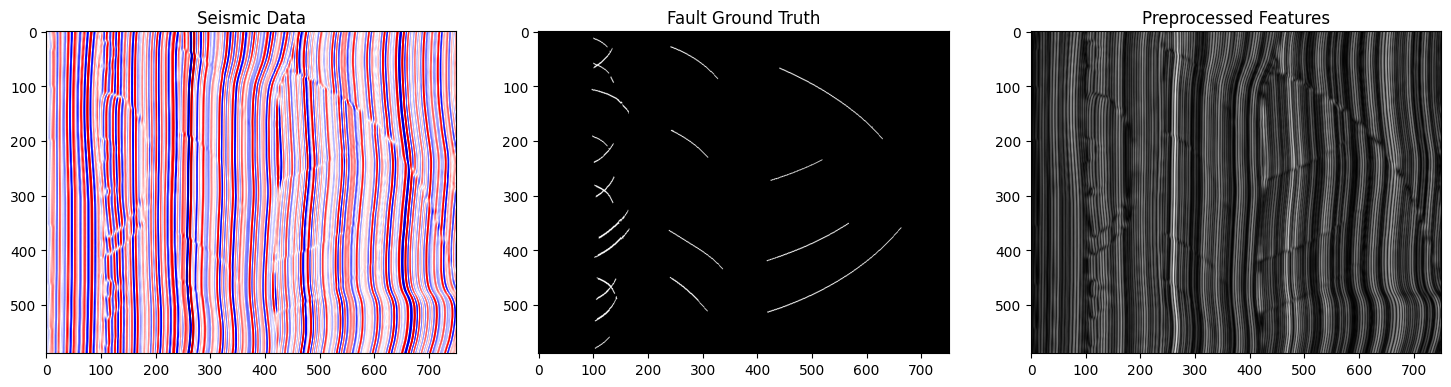

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99   8809743
         1.0       0.01      0.00      0.00    125505

    accuracy                           0.99   8935248
   macro avg       0.50      0.50      0.50   8935248
weighted avg       0.97      0.99      0.98   8935248

Confusion Matrix:
 [[8808582    1161]
 [ 125490      15]]


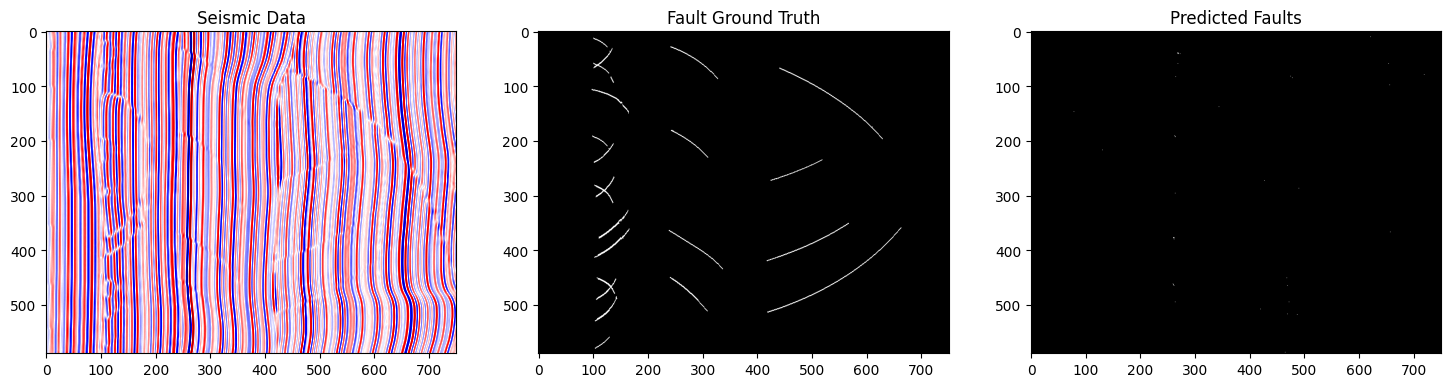

In [10]:

faults = segy2numpy(filename_fault)

seismic= segy2numpy(filename_seismic)

preprocessed = preprocess_data(seismic)
visualize_data(seismic, faults, preprocessed)

features, labels = extract_features_and_labels(seismic, faults)
rf, pca = train_random_forest(features, labels, n_components=None)  # Skip PCA if unnecessary

predictions = predict_faults(rf, pca, seismic)
visualize_predictions(seismic, faults, predictions)